In [8]:
import pandas as pd
import numpy as np
#reading input data files for ml model training 
train_data = pd.read_excel("PQ_1.xlsx", usecols="B:E",skiprows=100002)
Vdc_1=pd.read_excel("Vdc_1.xlsx", usecols="B:C",skiprows=100002)
Vs_1=pd.read_excel("Vs_1.xlsx", usecols="B:D",skiprows=100002)
Idc_1=pd.read_excel("Idc_1.xlsx", usecols="B:C",skiprows=100002)
Is_1=pd.read_excel("Is_1.xlsx", usecols="B:D",skiprows=100002)
train_data=np.concatenate((train_data, Vdc_1,Vs_1,Idc_1,Is_1), axis=1)
train_data = pd.DataFrame(data=train_data)
print(train_data.shape)
train_data.describe()

(50000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-931.875523,899.996451,0.010224,-0.004468,599.981783,594.225500,0.003480,0.001547,-0.005027,-1.535362,-1.530386,0.000114,-0.001364,0.001250
std,2.466219,0.154757,0.174811,0.161377,1.628571,1.666889,218.068474,218.039698,218.023325,0.021992,0.027448,1.425044,1.425668,1.424904
min,-939.392780,899.526106,-0.686010,-0.518044,595.359047,589.881844,-317.155719,-317.174208,-316.946901,-1.626516,-1.650864,-2.040729,-2.042136,-2.036507
25%,-932.674144,899.886207,-0.102493,-0.117979,598.735286,593.014749,-214.204689,-214.404769,-214.474508,-1.549718,-1.547341,-1.425896,-1.428106,-1.424386
50%,-931.783435,899.991315,0.014799,-0.006892,599.994797,594.167872,0.212797,-0.108504,-0.998207,-1.533815,-1.529109,-0.000717,0.000268,0.000341
75%,-931.011394,900.099170,0.128662,0.109586,601.202982,595.453952,214.327320,214.794533,214.342607,-1.519686,-1.511834,1.426188,1.424922,1.427599
max,-921.782518,900.515468,0.604444,0.488796,605.351088,598.615021,316.935574,316.924889,316.981069,-1.468571,-1.441937,2.038365,2.042171,2.044322


In [9]:
#reading outlier data points, outliers correspond to faults 
outlier_data = pd.read_excel("PQ_4.xlsx", usecols="B:E",skiprows=100002)
Vdc_4=pd.read_excel("Vdc_4.xlsx", usecols="B:C",skiprows=100002)
Vs_4=pd.read_excel("Vs_4.xlsx", usecols="B:D",skiprows=100002)
Idc_4=pd.read_excel("Idc_4.xlsx", usecols="B:C",skiprows=100002)
Is_4=pd.read_excel("Is_4.xlsx", usecols="B:D",skiprows=100002)
outlier_data=np.concatenate((outlier_data, Vdc_4,Vs_4,Idc_4,Is_4), axis=1)
outlier_data = pd.DataFrame(data=outlier_data)
print(outlier_data.shape)
outlier_data.describe()

(50000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.040621,-2.394531,-9.466789,-0.163484,517.990607,517.946602,-0.000189,-0.003975,0.004164,-0.000025,0.004267,-0.000069,-0.001765,0.001834
std,0.112897,0.377157,0.112908,0.457593,0.489655,0.405483,230.319736,230.317741,230.319156,0.000005,0.005531,0.013701,0.013705,0.013697
min,-0.205278,-3.439062,-9.631299,-0.968161,516.529183,516.713063,-325.715280,-325.719085,-325.712496,-0.000031,-0.012950,-0.019475,-0.021218,-0.017578
25%,-0.153426,-2.662766,-9.579648,-0.606432,517.657080,517.613759,-230.305747,-230.090422,-230.057908,-0.000028,0.000201,-0.013771,-0.015469,-0.011863
50%,-0.040563,-2.393745,-9.466822,-0.147647,517.919936,517.932874,-0.000158,-0.004011,0.004169,-0.000026,0.004453,-0.000069,-0.001765,0.001833
75%,0.072228,-2.131181,-9.353977,0.271564,518.374724,518.284778,230.305429,230.082392,230.066289,-0.000021,0.008278,0.013632,0.011940,0.015530
max,0.123907,-1.349398,-9.302103,0.647441,519.239847,519.021783,325.719282,325.711087,325.717931,-0.000016,0.022423,0.019336,0.017689,0.021247


In [10]:
#training iForest 
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=10, random_state=rng, behaviour="new",contamination=0.01)
clf.fit(train_data)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples=10, n_estimators=100, n_jobs=None,
                random_state=RandomState(MT19937) at 0x11B6429E0, verbose=0,
                warm_start=False)

In [11]:
y_pred_train=clf.predict(train_data)
y_pred_outliers=clf.predict(outlier_data)
n_error_train=y_pred_train[y_pred_train==-1].size
print('train accuracy:',100-n_error_train/50000*100)
n_accuracy_outliers=y_pred_outliers[y_pred_outliers==-1].size
print('outlier prediction accuracy:' ,n_accuracy_outliers/50000*100)

train accuracy: 99.0
outlier prediction accuracy: 100.0


In [12]:
#training One class SVM 
from sklearn import svm
model=svm.OneClassSVM(nu=0.03,kernel='rbf',gamma=0.01)
model.fit(train_data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='rbf',
            max_iter=-1, nu=0.03, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [13]:
y_pred_train_svm=model.predict(train_data)
n_error_train_svm=y_pred_train_svm[y_pred_train_svm==-1].size
print('train accuracy:',100-n_error_train_svm/50000*100)

train accuracy: 96.904


In [14]:
y_pred_outliers_svm=model.predict(outlier_data)
n_accuracy_outliers_svm=y_pred_outliers_svm[y_pred_outliers_svm==-1].size
print('outlier prediction accuracy:' ,n_accuracy_outliers_svm/50000*100)

outlier prediction accuracy: 100.0


In [15]:
#data to be displayed on unity
MMC1Vlc_1=pd.read_excel("MMC1Vlc_1.xlsx", usecols="B:AE",skiprows=100002)
MMC1Vlc_4=pd.read_excel("MMC1Vlc_4.xlsx", usecols="B:AE",skiprows=100002)
MMC1Vlc=np.concatenate((MMC1Vlc_1,MMC1Vlc_4), axis=0)
ML_prediction=np.concatenate((y_pred_train,y_pred_outliers), axis=0)
print(MMC1Vlc.shape)
print(ML_prediction.shape)

(100000, 30)
(100000,)


In [16]:
import requests 
import json 
import time 
import datetime

API_ENDPOINT = "https://bmgxwpyyd2.execute-api.us-east-1.amazonaws.com/prod/sensordata"


In [34]:
i=0
for counter in range(0,(MMC1Vlc.shape[0]-1)): 
    sm_v=MMC1Vlc[counter]
    prediction=ML_prediction[counter]
    sensor={"sm1":str(sm_v[0]),"sm2":str(sm_v[1]) ,"sm3": str(sm_v[2]),"sm4": str(sm_v[3]),"sm5":str(sm_v[4]),
            "sm6": str(sm_v[5]) ,"sm7":str(sm_v[6]) ,"sm8":str(sm_v[7]) ,"sm9":str(sm_v[8]) ,"sm10":str(sm_v[9]) ,
            "sm11": str(sm_v[10]) ,"sm12":str(sm_v[11]) ,"sm13":str(sm_v[12]) ,"sm14":str(sm_v[13]) ,"sm15":str(sm_v[14]) ,
            "sm16": str(sm_v[15]) ,"sm17":str(sm_v[16]) ,"sm18":str(sm_v[17]) ,"sm19":str(sm_v[18]) ,"sm20":str(sm_v[19]) ,
            "sm21": str(sm_v[20]) ,"sm22":str(sm_v[21]) ,"sm23":str(sm_v[22]) ,"sm24":str(sm_v[23]) ,
            "ml_prediction": str(prediction)}
    
    sensor2={"sm25":str(sm_v[24]) ,"sm26": str(sm_v[25]) ,"sm27":str(sm_v[26]) ,"sm28":str(sm_v[27]) ,"sm29":str(sm_v[28]) ,
             "sm30":str(sm_v[29])
            }

    # data to be sent to api 
    data = {'timestamp':"{:%Y-%m-%d %H:%M:%S}".format(datetime.datetime.now()), 
            'sensorValues': json.dumps(sensor)
           }
    data2 = {'timestamp':"{:%Y-%m-%d %H:%M:%S}".format(datetime.datetime.now()), 
            'sensorValues': json.dumps(sensor2)
           }
    #data uploading is commented for now considering posting limit of aws 
    #r = requests.post(url = API_ENDPOINT, json = data) 
    #print("Data returned =%s"%r.text)
    i+=1
    #time.sleep(0.02)
    
print(data)
print(i)

{'timestamp': '2020-04-12 16:42:15', 'sensorValues': '{"sm1": "20.4513083514", "sm2": "20.7647577237", "sm3": "20.2066547548", "sm4": "20.7689340097", "sm5": "20.6868415675", "sm6": "20.7070167752", "sm7": "20.7594547625", "sm8": "20.7585796267", "sm9": "20.7053430575", "sm10": "20.7645757216", "sm11": "20.7741159863", "sm12": "20.2305661793", "sm13": "20.6842949952", "sm14": "20.7030147186", "sm15": "20.1846139703", "sm16": "20.8033918196", "sm17": "20.2915486094", "sm18": "20.6769631296", "sm19": "20.6784845669", "sm20": "20.6580434021", "sm21": "20.1847069344", "sm22": "20.4024137017", "sm23": "20.7443473273", "sm24": "20.8102861434", "ml_prediction": "-1"}'}
99999


In [35]:
#uploads the last row of data for now 
r = requests.post(url = API_ENDPOINT, json = data) 
r2=  requests.post(url = API_ENDPOINT, json = data2) 

print("Data returned =%s"%r.text)
print("Data returned =%s"%r2.text)

Data returned ={"active":false}
Data returned ={"active":false}


Text(0, 0.5, 'MMC1: submodule 2 voltage ')

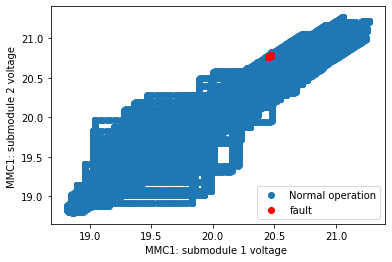

In [100]:
MMC1Vlc=pd.DataFrame(data=MMC1Vlc)
import matplotlib.pyplot as plt
x=MMC1Vlc.iloc[0:49999,0]
y=MMC1Vlc.iloc[0:49999,1]
a=plt.scatter(x, y)
x=MMC1Vlc.iloc[50000:99999,0]
y=MMC1Vlc.iloc[50000:99999,1]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="lower right")
plt.xlabel("MMC1: submodule 1 voltage ")
plt.ylabel("MMC1: submodule 2 voltage ")

Text(0, 0.5, 'Vsb1')

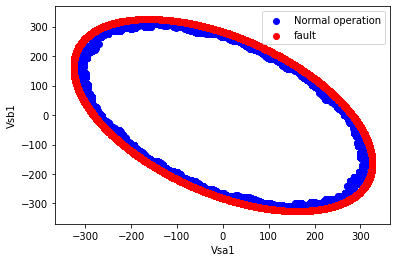

In [101]:
x=Vs_1.iloc[:,0]
y=Vs_1.iloc[:,1]
a=plt.scatter(x, y,color='b')
x=Vs_4.iloc[:,0]
y=Vs_4.iloc[:,1]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="upper right")
plt.xlabel("Vsa1")
plt.ylabel("Vsb1")

Text(0, 0.5, 'Vd2')

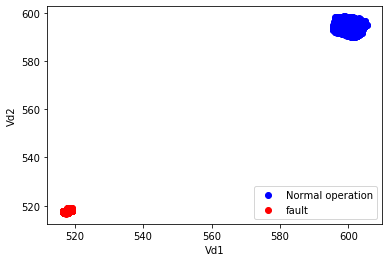

In [102]:
x=Vdc_1.iloc[:,0]
y=Vdc_1.iloc[:,1]
a=plt.scatter(x, y, color='b')
x=Vdc_4.iloc[:,0]
y=Vdc_4.iloc[:,1]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="lower right")
plt.xlabel("Vd1")
plt.ylabel("Vd2")

Text(0, 0.5, 'Q2')

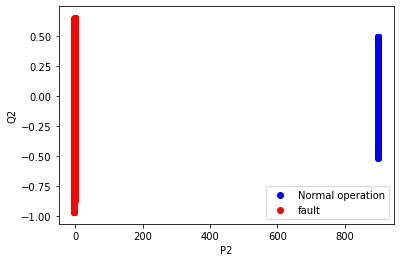

In [103]:
#P vs Q 
x=train_data.iloc[:,1]
y=train_data.iloc[:,3]
a=plt.scatter(x, y, color='b')
x=outlier_data.iloc[:,1]
y=outlier_data.iloc[:,3]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="lower right")
plt.xlabel("P2")
plt.ylabel("Q2")

Text(0, 0.5, 'Idc2')

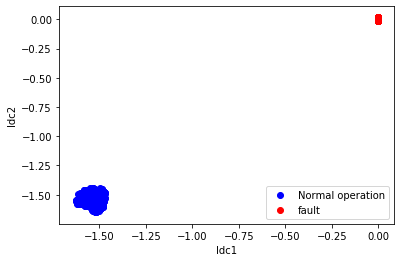

In [104]:
x=Idc_1.iloc[:,0]
y=Idc_1.iloc[:,1]
a=plt.scatter(x, y, color='b')
x=Idc_4.iloc[:,0]
y=Idc_4.iloc[:,1]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="lower right")
plt.xlabel("Idc1")
plt.ylabel("Idc2")

Text(0, 0.5, 'Ib1')

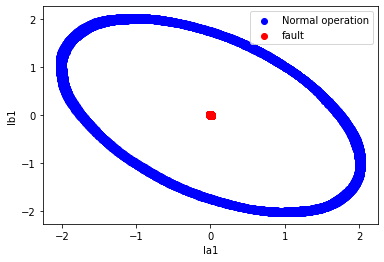

In [105]:
x=Is_1.iloc[:,0]
y=Is_1.iloc[:,1]
a=plt.scatter(x, y,color='b')
x=Is_4.iloc[:,0]
y=Is_4.iloc[:,1]
b=plt.scatter(x, y,color='r')
plt.legend([a,b],["Normal operation", "fault"],loc="upper right")
plt.xlabel("Ia1")
plt.ylabel("Ib1")